In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Zomato data .csv")
# print(data.head())

In [4]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
def handle (value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

data["rate"]  =  data["rate"].apply(handle)
# print(data)
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Text(0.5, 0, 'Type of Resturant')

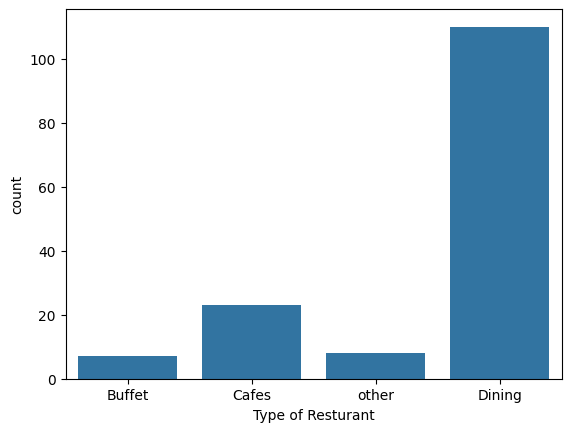

In [6]:
sns.countplot(x = data["listed_in(type)"])
plt.xlabel("Type of Resturant")

Text(0, 0.5, 'Votes')

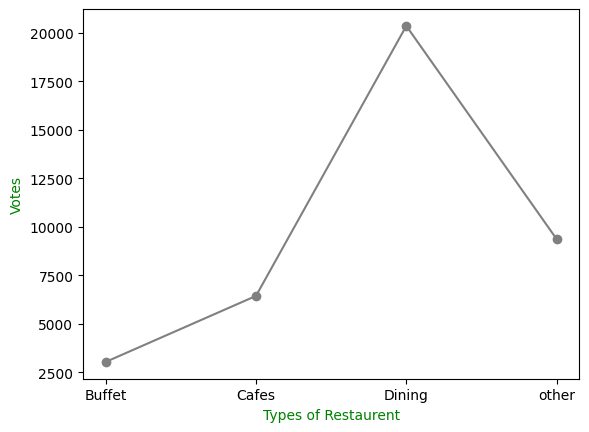

In [15]:
group_data = data.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": group_data})

plt.plot(result, c='gray', marker="o")
plt.xlabel("Types of Restaurent", c="green", size= 10)
plt.ylabel("Votes", c= "green", size= 10)

<function matplotlib.pyplot.show(close=None, block=None)>

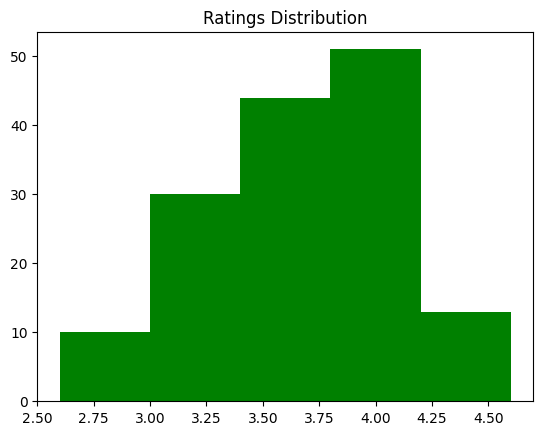

In [20]:
plt.hist(data["rate"], bins= 5, color="green")
plt.title("Ratings Distribution")
plt.show

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

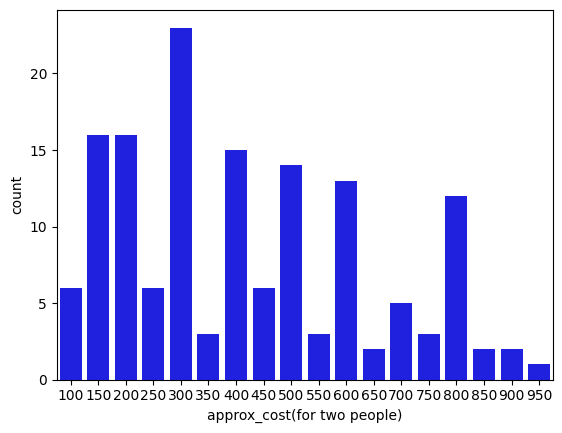

In [23]:
couple= data["approx_cost(for two people)"]
sns.countplot(x = couple, color="blue")  # Replace with a valid color name or code

<Axes: xlabel='online_order', ylabel='rate'>

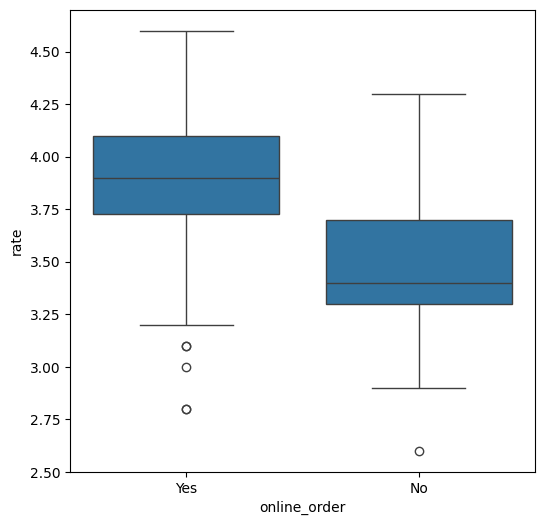

In [28]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="online_order", y="rate", data=data)

<function matplotlib.pyplot.show(close=None, block=None)>

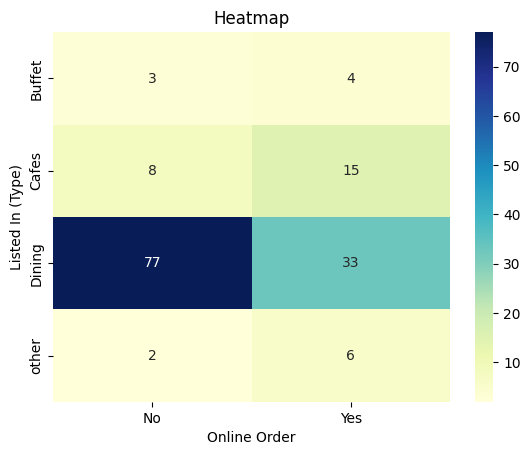

In [29]:
pivot_table= data.pivot_table(index="listed_in(type)", columns="online_order", aggfunc= "size", fill_value = 0)
sns.heatmap(pivot_table, annot= True, cmap= "YlGnBu", fmt="d")
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show